## Assignment 5A

### Problem 1 (100 points)
Consider the Schrodinger equation for a particle of mass m in the harmonic potential $V(x)=\dfrac{V_0}{a^2}x^2$:
$$-\dfrac{1}{2}\dfrac{d^2}{dx^2}\psi(x)+V(x)\psi(x)=E\psi(x)$$
where $V_0$ and $a$ are constants.

After converting this second-order equation into a 2-dimensional first-order equation, write a program to solve this system using the shooting method and the 4th-order Runge-Kutta (RK4) method.

As explained in class, you will need to write a program to find the energies, starting with an initial guess for the energy and use a root-finding method to refine the guess until you find accurate values.

We can convert the system into the following:
$$\dfrac{d^2\psi(x)}{dx^2}=2(V(x)-E)\psi(x)$$
Writing it as a system of first order, we get:
$$\begin{align}
\dfrac{d\psi(x)}{dx}&=\phi(x)\\
\dfrac{d\phi(x)}{dx}&=2(V(x)-E)\psi(x)
\end{align}$$

The external conditions would require that:
$$\lim_{x\rightarrow \pm Na}\psi(x)=0$$
Which we'll extend for larger values of $N$ to recover the true wavefunction later.

#### Problem 1.A (30 points)
Start from one of the boundaries — in a similar fashion as in the example of the infinite square well, discussed in class. Set the value of $N$, controlling the size of the box, to be sufficiently large that the eigenfunctions and eigenvalues you aim to calculate are converged to satisfactory accuracy. Start from $N = 2$, then $N = 3, 4, $ etc... What happens?

0.7071067824382516
[0.7071067811865476, 2.121320343559643, 3.5355339059327378, 4.949747468305833, 6.3639610306789285, 7.778174593052023, 9.19238815542512, 10.606601717798213, 12.020815280171309, 13.435028842544403]


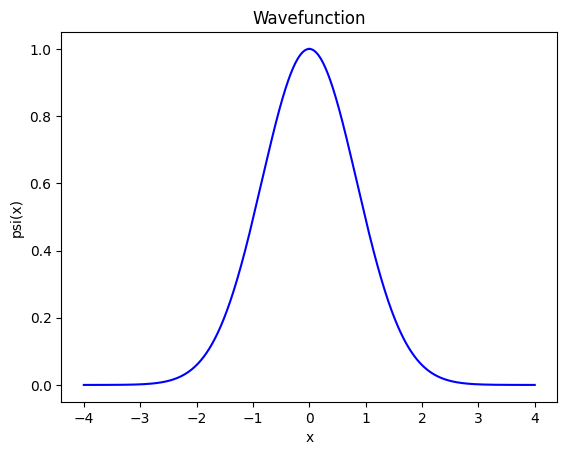

In [2]:
import numpy as np


def continuous_runge_kutta_method_function(
    f: callable,
    t0: float | int,
    x0: float | int | np.ndarray | tuple | list,
    dt: float | int,
    tf: float | int
) -> tuple[np.ndarray, np.ndarray]:
    """
    Runge-Kutta Method for solving ordinary differential equations.
    This function solves the ODE using the Runge-Kutta Method and returns the time and value arrays.
    
    Parameters:
        f: callable - The function equal to the derivative of the unknown function
        t0: float | int - The initial time
        x0: float | int - The initial value(s)
        dt: float | int - The time step
        tf: float | int - The final time

    Returns:
        tuple[np.ndarray, np.ndarray] - The time and value arrays
    """

    # Input Checking
    assert callable(f)
    assert isinstance(t0, (int, float))
    assert isinstance(x0, (int, float, np.ndarray, tuple, list))
    assert isinstance(dt, (int, float))
    assert isinstance(tf, (int, float))

    # Implementation
    T = np.arange(t0, tf+dt, dt)
    x = [x0]
    for t in T[:-1]:
        k1 = f(t       , x[-1]          )
        k2 = f(t + dt/2, x[-1] + k1*dt/2)
        k3 = f(t + dt/2, x[-1] + k2*dt/2)
        k4 = f(t + dt  , x[-1] + k3*dt  )
        x.append(x[-1] + (k1 + 2*k2 + 2*k3 + k4)*dt/6)
    return T, x
def continuous_secant_method_value(*,
    f: callable, 
    x0: int | float, 
    x1: int | float, 
    error: int | float, 
    max_iter: int
) -> float:
    """
    Secant Method for Continuous Functions (Single Variable)
    Returns the value of x that is the root of the function

    Parameters
    ----------
    f : callable
        The function to find the root of
    x0 : int | float
        The first guess of the root
    x1 : int | float
        The second guess of the root
    error : int | float
        The error tolerance
    max_iter : int
        The maximum number of iterations

    Returns
    -------
    float
        The value of x that is the root of the function
    """

    # Type Checking
    assert callable(f)
    assert isinstance(x0, (int, float))
    assert isinstance(x1, (int, float))
    assert x0 != x1, "Guesses x0 and x1 cannot be the same"
    assert isinstance(error, (int, float))
    assert error > 0
    assert isinstance(max_iter, int)
    assert max_iter > 0

    # Implementation
    for _ in range(max_iter):
        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if np.abs(x2 - x1) < error:
            return x2
        x0, x1 = x1, x2
    else:
        return x2


# Problem Parameters
V0, A = 1, 1
V: callable = lambda x: V0 * x**2 / A**2
N = 4
x0: float = 0
psi0: np.ndarray = np.array([1, 0])

# Wavefunction ODE
minimized_energy = continuous_secant_method_value(
    f=lambda E: continuous_runge_kutta_method_function(
        lambda x, psi: np.array([psi[1], 2*(V(x)-E)*psi[0]]),
        t0=x0, x0=psi0, dt=0.01, tf=N*A
    )[1][-1][0],
    x0=0.2,
    x1=0.4,
    error=1e-6,
    max_iter=1000
)
print(minimized_energy)

# Find the wavefunction
val = continuous_runge_kutta_method_function(
    f=lambda x, psi: np.array([psi[1], 2*(V(x)-minimized_energy)*psi[0]]),
    t0=x0, x0=psi0, dt=0.01, tf=N*A
)

# Analytical Solution
true_energies = [float((0.5+n)*np.sqrt(2*V0)/A) for n in range(10)]
print(true_energies)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(val[0], [v[0] for v in val[1]], color="blue")
plt.plot(-val[0], [v[0] for v in val[1]], color="blue")
plt.xlabel("x")
plt.ylabel("psi(x)")
plt.title("Wavefunction")
plt.show()


What’s the the problem you observe if N is too small?
> When $N$ is too small, the energy value I get is much higher. For example, when I set $N=1$, I get a ground-state energy of 1.3621, which is much higher than 0.3536. For smaller values of $N$ the energy value becomes orders of magnitude higher, which makes sense since we're measuring less of the interval.

What’s the problem you observe if N is too large?
> After about the 7th digit for energy, the value converges pretty much as close as it will, and doesn't really get any closer to the true value.
> The wavefunction also starts to have some really odd behavior like being extremely huge despite the identical energy. The example of $N=10$ made the wavefunction drop super negative far out from the origin.

Why are the so-obtained wavefunctions very large in absolute value (before to be normalized, as asked below in point c)?
> At large values of $N$, the differential equation eventually dips below the x-axis and starts to increase in magnitude more and more.
> It also happens when it doesn't drop hugely, and that's due to the nature of the approximation adding more area under larger $N$.

#### Problem 1.B (20 points)
Compare your numerical energy eigenvalues with the exact solutions given in the lecture:
$$\begin{align}
E_n&=\left(n+\dfrac{1}{2}\right)\omega &
\omega&=\sqrt{\dfrac{2V_0}{a^2}}
\end{align}$$

Using the code from above to approximate the wavefunction energy, we can see that:

| State | Eigenvalue | $N=2$ | $N=3$ | $N=4$ |
| ----- | ----- | ----- | ----- | ----- |
| GS | 0.7071067811865476 | 0.7190949697440874 | 0.70712294274875 | 0.7071067824382516 |
| 1st excited  | 2.121320343559643 | 2.2340178098341923 | 2.1216938947777417 | 2.1213203931792384 |
| 2nd excited  | 3.5355339059327378 |4.01286843444438 | 3.539428062916954 | 3.5355348909228477 |



#### Problem 1.C (20 points)
Normalize your wavefunctions by evaluating the integral:
$$I=\int |\psi(x)|^2 dx$$
and rescale $\psi(x)$ so that $I = 1$. Either the trapezoidal rule or Simpson’s rule will give a reasonable approximation for the integral. Once your wavefunctions are normalized, plot them in comparison with the exact analytical solutions provided in class, and discuss how well your numerical approximations match the exact solutions.

Calculated Energy: 2.1213203931792384
Normalization Integral: 0.26347680922271083
Normalized Integral: 1.0
True Energies: [0.7071067811865476, 2.121320343559643, 3.5355339059327378, 4.949747468305833, 6.3639610306789285, 7.778174593052023, 9.19238815542512, 10.606601717798213, 12.020815280171309, 13.435028842544403]


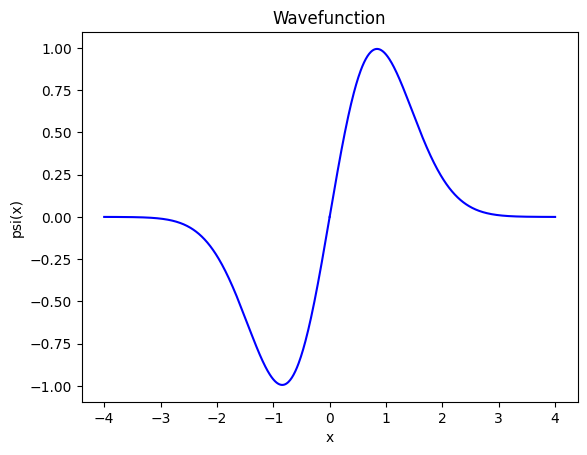

In [3]:
# Problem Parameters
V0, A = 1, 1
V: callable = lambda x: V0 * x**2 / A**2
N = 4
x0: float = 0

# Choice of wavefunction (config box)
EVEN_QUANTUM_NUMBER = False
ENERGY_1 = 0.2
ENERGY_2 = 0.4
if EVEN_QUANTUM_NUMBER:
    psi0: np.ndarray = np.array([1, 0])
else:
    psi0: np.ndarray = np.array([0, 1])

# Wavefunction ODE
minimized_energy = continuous_secant_method_value(
    f=lambda E: continuous_runge_kutta_method_function(
        lambda x, psi: np.array([psi[1], 2*(V(x)-E)*psi[0]]),
        t0=x0, x0=psi0, dt=0.01, tf=N*A
    )[1][-1][0],
    x0=ENERGY_1,
    x1=ENERGY_2,
    error=1e-6,
    max_iter=1000
)
print(f"Calculated Energy: {minimized_energy}")

# Find the wavefunction
val = continuous_runge_kutta_method_function(
    f=lambda x, psi: np.array([psi[1], 2*(V(x)-minimized_energy)*psi[0]]),
    t0=x0, x0=psi0, dt=0.01, tf=N*A
)

# Integrate the wavefunction to normalize it
integral = np.trapezoid([v[0]**2 for v in val[1]], x=val[0])
print(f"Integral Area: {integral}")
new_y = np.array([v[0]/np.sqrt(integral) for v in val[1]])

# Verify normalization
integral = np.trapezoid([v**2 for v in new_y], x=val[0])
print(f"Normalized Integral (Must be 1): {integral}")

# Analytical Solution
true_energies = [float((0.5+n)*np.sqrt(2*V0)/A) for n in range(10)]
print(f"True Energies: {true_energies}")

# Plot the results
import matplotlib.pyplot as plt
plt.plot(val[0], new_y, color="blue")
plt.plot(-val[0], (-1 if not EVEN_QUANTUM_NUMBER else 1)*new_y, color="blue")
plt.xlabel("x")
plt.ylabel("psi(x)")
plt.title("Wavefunction")
plt.show()

#### Problem 1.D (30 points) 
The harmonic oscillator potential is symmetric, meaning $V (x) = V (−x)$. Consequently, as explained in class, the solutions will either be even ($\psi(x) = \psi(−x)$) or odd ($\psi(x) =−\psi(−x)$).

You can take advantage of this symmetry to simplify your numerical calculations, calculating the wavefunction over only for half of the system, starting the RK4 integration from appropriate (parity-dependent) initial conditions at the origin, as explained in class.

Repeat all calculations above using this method (you don’t need to normalize the solution).

Are the so-obtained wavefunctions still very large in absolute value (before to be normalized)? Why?

> Similar reasons as above. Also, I had already implemented the symmetry in my simulation above since it was apparent from the equation of motion of the system.
> The solutions are still large since the area scales with the area under the curve in $N$ early.